# This is the prediction part we do by machine learning
mainly use:
 - get.dummies()
 - StackingClassfier


In [4]:
import pandas as pd
df = pd.read_csv('train.csv')

In [5]:
# delete useless statistics
df.drop(['ID','Customer_ID','Name','SSN'],axis=1,inplace=True)

In [6]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [7]:
df.Credit_Mix.value_counts()

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

In [8]:
m = {
    "Good" : 0,
    "Standard": 1,
    "Bad": 2
}

In [9]:
df.Credit_Mix = df.Credit_Mix.map(m)

In [10]:
df.Credit_Mix.value_counts()

1    45848
0    30384
2    23768
Name: Credit_Mix, dtype: int64

<AxesSubplot: >

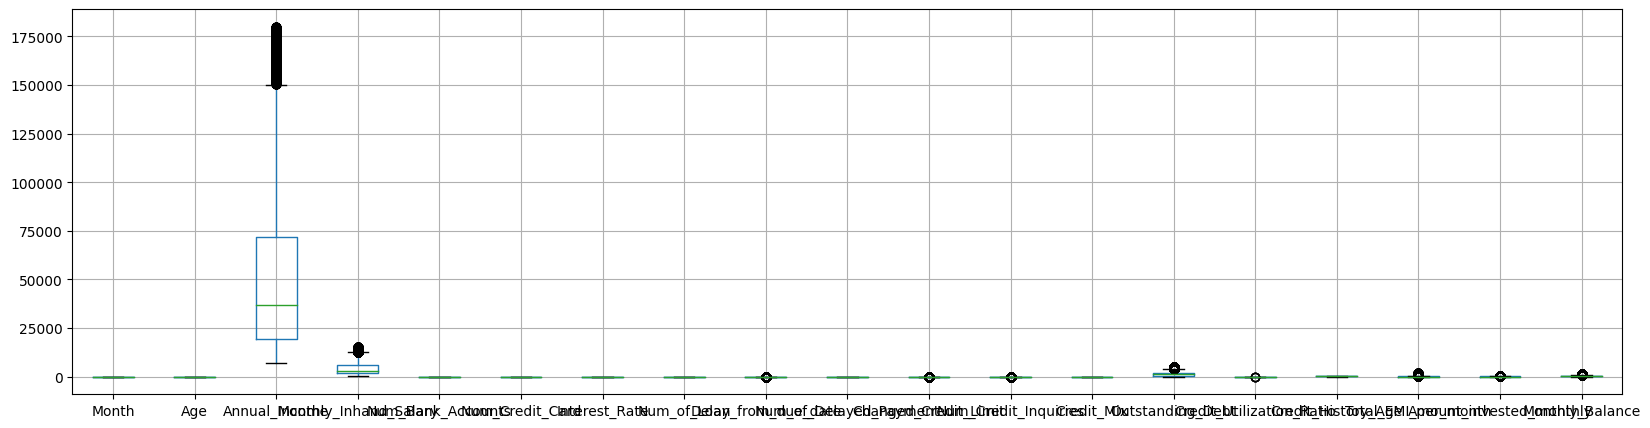

In [11]:
# handling outlier numerical
df.boxplot(figsize=(20,5))

# Handling Categorial

In [12]:
df.select_dtypes(include="object")

,Occupation,Type_of_Loan,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",No,High_spent_Small_value_payments,Good
1,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",No,Low_spent_Large_value_payments,Good
2,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",No,Low_spent_Medium_value_payments,Good
3,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",No,Low_spent_Small_value_payments,Good
4,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...
99995,Mechanic,"Auto Loan, and Student Loan",No,High_spent_Large_value_payments,Poor
99996,Mechanic,"Auto Loan, and Student Loan",No,High_spent_Medium_value_payments,Poor
99997,Mechanic,"Auto Loan, and Student Loan",No,High_spent_Large_value_payments,Poor
99998,Mechanic,"Auto Loan, and Student Loan",No,Low_spent_Large_value_payments,Standard


In [13]:
for i in df['Type_of_Loan'].value_counts().head(9).index[1:] : 
    df[i] = df['Type_of_Loan'].str.contains(i)

del df['Type_of_Loan']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  in

In [15]:
m = {
    "Good" : 0,
    "Standard": 1,
    "Poor": 2
}
df.Credit_Score.value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [16]:
df.Credit_Score= df.Credit_Score.map(m)

In [17]:
df.Credit_Score.value_counts()

1    53174
2    28998
0    17828
Name: Credit_Score, dtype: int64

In [18]:
df = pd.get_dummies(df,drop_first=True) # one-hot

In [19]:
df.Occupation_Architect.value_counts()

0    93176
1     6824
Name: Occupation_Architect, dtype: int64

In [20]:
df.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,1,0,0,1,0,0,1,0,0,0
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,1,0,0,1,0,0,0,1,0,0
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,1,0,0,1,0,0,0,0,1,0
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,1,0,0,1,0,0,0,0,0,1
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,1,0,0,1,0,1,0,0,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 49 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Month                                               100000 non-null  int64  
 1   Age                                                 100000 non-null  float64
 2   Annual_Income                                       100000 non-null  float64
 3   Monthly_Inhand_Salary                               100000 non-null  float64
 4   Num_Bank_Accounts                                   100000 non-null  float64
 5   Num_Credit_Card                                     100000 non-null  float64
 6   Interest_Rate                                       100000 non-null  float64
 7   Num_of_Loan                                         100000 non-null  float64
 8   Delay_from_due_date                                 100000 non-nu

In [23]:
X, y = df.drop("Credit_Score",axis=1).values, df["Credit_Score"]

# Handle Imbalanced Class Value

In [24]:
from imblearn.over_sampling import SMOTE
y.value_counts(normalize=1)# smote 处理数据不平衡

1    0.53174
2    0.28998
0    0.17828
Name: Credit_Score, dtype: float64

In [25]:
rus = SMOTE(sampling_strategy='auto')
X_data_rus, y_data_rus = rus.fit_resample(X, y)

In [26]:
y_data_rus.value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
Name: Credit_Score, dtype: float64

# Split the train and test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_rus, y_data_rus, test_size=0.3, random_state=42,stratify=y_data_rus)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [30]:
# Modeling and evaluation 
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
#from xgboost import XGBClassifier

c:\Users\15726\miniconda3\envs\ds\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [31]:
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
histGradientBoosting = HistGradientBoostingClassifier()
#XGB = XGBClassifier(n_jobs=-1)经过优化的分布式梯度提升库

model = StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    
], n_jobs=-1)
#('XGB', XGB)

In [32]:
model.fit(X_train, y_train)

StackingClassifier(estimators=[('bagging', BaggingClassifier(n_jobs=-1)),
                               ('extraTress',
                                ExtraTreesClassifier(max_depth=10, n_jobs=-1)),
                               ('randomforest',
                                RandomForestClassifier(n_jobs=-1)),
                               ('histGradientBoosting',
                                HistGradientBoostingClassifier())],
                   n_jobs=-1)

In [33]:
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print(accuracy_score(y_pred,y_test))

0.8769041101615229


In [37]:
from sklearn.metrics import classification_report 
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     16248
           1       0.82      0.84      0.83     15619
           2       0.89      0.88      0.88     15990

    accuracy                           0.88     47857
   macro avg       0.88      0.88      0.88     47857
weighted avg       0.88      0.88      0.88     47857

